# NNIA: Tutorial 6 - 19.12.2017

---

In [1]:
# Set notebook to full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Quiz 2

- [Model capacity](https://cbmm.mit.edu/sites/default/files/publications/CBMM-Memo-067.pdf)
- Loss functions
- Hidden units
- Regularization
- Backprop

$1)$ Model capacity

![Model Capacity](./model-capacity.png)

Source: [Deep Learning - Goodfellow et al.](http://www.deeplearningbook.org/)

$2)$ Loss functions

$$MSE = \mathcal{J}(\theta) = \sum_{i=0}^m (y_i - \hat{y}_i)^2 = \sum_{i=0}^m (y_i - f(x_i; \theta))^2$$ 

$$CE = \mathcal{J}(\theta) = - \sum_{i=0}^m (y_i - log(\hat{y}_i))$$

$3)$ Hidden units

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

$$relu(x) = \max\{0, x\} =
\begin{cases}
0,  & \text{if $x \leq 0$} \\
x, & \text{else}
\end{cases}$$

In [10]:
import numpy as np

xs = np.linspace(-5, 5, 1000)

def relu(x):
    return np.maximum(0, x)

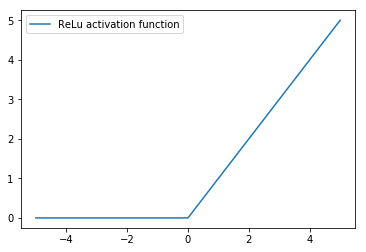

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(xs, relu(xs), label='ReLu activation function')
plt.legend();

In [18]:
import tensorflow as tf

isess = tf.InteractiveSession()
x = tf.constant(0.0)
r = tf.nn.relu(x)
print(r.eval())
isess.close()

0.0


$4)$ Regularization

$$\mathcal{R}_1 = \lambda * \lVert w \rVert_2^2$$

$$\mathcal{R}_2 = \lambda * \lVert w \rVert_1$$

$$\nabla_w \mathcal{R}_1 = \lambda 2w$$

$$\nabla_w \mathcal{R}_2 = \lambda * sign(w)$$

$5)$ Backprop

![Backprop](./backprop.png)

---

## Cross-Entropy-Loss

---

## Assignment-6

#### 1. Regularization methods in ML

---

#### 2. Impact of different norms

In [3]:
from IPython.display import IFrame
IFrame("http://www-bcf.usc.edu/~gareth/ISL/Chapter6/6.7.pdf", width=1200, height=600)

Source: http://www-bcf.usc.edu/~gareth/ISL/data.html

---

#### 3. Backprop

![Neural Network](http://neuralnetworksanddeeplearning.com/images/tikz16.png)

[Example](http://neuralnetworksanddeeplearning.com/chap2.html)

---

#### 4. Feed-forward neural net in python

[Example](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py)

---